In [ ]:
pip install ydata_profiling

Contexto
Uma empresa do ramo de e-commerce contratou você para levantar os indicadores de
recência, frequência e ticket médio (RFM) dos seus clientes.
A saber RFM:
R (Recency): Tempo que o cliente realizou a última compra (em dias)
F (Frequency): Quantidade de compras realizadas pelo cliente
M (Monetary): Valor do ticket médio gasto pelo cliente
onde ticket médio = média do total gasto por pedido para cada cliente.
Para isso, vocês receberam uma base de dados (arquivo csv) e devem construir um
código em Python que gera um output também csv, porém contendo apenas a
identificação do cliente e métricas RFM.


In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
upload = files.upload()

Saving data.csv to data (1).csv


###Verificando os dados iniciais

In [ ]:
df = pd.read_csv('data.csv',encoding= 'unicode_escape')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

# Verificando as estatísticas

In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

# Utilizando a biblioteca "pandas_profiling" para verificar :

### As variáveis separadamente.

### Vericar se há dados nulos ou duplicados.

### As correlações e interações entre os dados.



In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Segundo a análise é possivel afirmar:
### 1 - Há valores duplicados.
### 2 - A coluna 'CustomerID' e 'Description tem dados faltantes.
### 3 - A coluna 'Quantity' existe um número negativo.
### 4 - A coluna 'UnitPrice' possui outliers.

#Identificando e removendo valores duplicados

In [ ]:
# Identificar valores duplicados
df[df.duplicated(keep=False)]

InvoiceNo StockCode                       Description  Quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
485     12/1/2010 11:45       4.95     17908.0  United Kingdom  
489     12/1/2010 11:45       2.10     17908.0  United Kingdom  
494     12/1/2010 11:45       1.25     17908.0  United Kingdom  
517     12/1/2010 11:45       1.25     17908.0  United Kingdom  
521     12/1/2010 11:45       2.95     17908.0  United Kingdom  
...                 ...        ...         ...             ...  
541675  12/9/2011 11:34       0.39     14446.0  United Kingdom  
541689  12/9/2011 11:34       2.49     14446.0  United Kingdom  
541692  12/9/2011 11:34       1.95     14446.0  United Kingdom  
541699  12/9/2011 11:34       2.10     14446.0  United Kingdom  
541701  12/9/2011 11:34       2.08     14446.0  United Kingdom  

[10147 rows x 8 columns]

In [ ]:
# Identificar quantos valores duplicados há em cada duplicata
(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(20)
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
541266    21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
572344    M         Manual                              48       10/24/2011 10:43 1.50      14607.0    United Kingdom             6
538514    21756     BATH BUILDING BLOCK WORD            1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6
541266    21754     HOME BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
578289    23395     BELLE JARDINIERE CUSHION COVER      1        11/23/2011 14:07 3.75      17841.0    United Kingdom             6
540524    21756     BATH BUILDING BLOCK WORD            1        1/9/2011 12:53   5.95      16735.0    United Kingdom             6
550331    85202     HANGING WOOD AND FELT HEART         1        4/17/2011 13:43  0.42      15555.0    United Kingdom             5
538517    22749     FELTCRAFT PRINCESS CHARLOTTE DOLL   1        12/12/2010 16:05 3.75      17618.0    United Kingdom             5
574481    23084     RABBIT NIGHT LIGHT                  1        11/4/2011 12:45  2.08      18022.0    United Kingdom             5
537224    70007     HI TEC ALPINE HAND WARMER           1        12/5/2010 16:24  1.65      13174.0    United Kingdom             5
547712    22699     ROSES REGENCY TEACUP AND SAUCER     1        3/24/2011 19:31  2.95      16905.0    United Kingdom             5
578519    20727     LUNCH BAG  BLACK SKULL.             1        11/24/2011 13:56 1.65      14591.0    United Kingdom             4
578289    23396     LE JARDIN BOTANIQUE CUSHION COVER   1        11/23/2011 14:07 3.75      17841.0    United Kingdom             4
574292    20751     FUNKY WASHING UP GLOVES ASSORTED    1        11/3/2011 15:27  2.10      16914.0    United Kingdom             4
550331    21383     PACK OF 12 STICKY BUNNIES           1        4/17/2011 13:43  0.65      15555.0    United Kingdom             4
574545    85174     S/4 CACTI CANDLES                   1        11/4/2011 14:54  4.95      17084.0    United Kingdom             4
553657    22131     FOOD CONTAINER SET 3 LOVE HEART     1        5/18/2011 11:28  1.95      14583.0    United Kingdom             4

In [ ]:
# Eliminando os valores duplicados
df=df.drop_duplicates()

# Identificando e removendo valores nulos

In [ ]:
# Identificar e mostrar valores nulos
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

In [ ]:
df[df.Description.isna()]

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970      536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971      536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972      536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987      536549    85226A         NaN         1  12/1/2010 14:34        0.0   
...          ...       ...         ...       ...              ...        ...   
535322    581199     84581         NaN        -2  12/7/2011 18:26        0.0   
535326    581203     23406         NaN        15  12/7/2011 18:31        0.0   
535332    581209     21620         NaN         6  12/7/2011 18:35        0.0   
536981    581234     72817         NaN        27  12/8/2011 10:33        0.0   
538554    581408     85175         NaN        20  12/8/2011 14:06        0.0   

        CustomerID         Country  
622            NaN  United Kingdom  
1970           NaN  United Kingdom  
1971           NaN  United Kingdom  
1972           NaN  United Kingdom  
1987           NaN  United Kingdom  
...            ...             ...  
535322         NaN  United Kingdom  
535326         NaN  United Kingdom  
535332         NaN  United Kingdom  
536981         NaN  United Kingdom  
538554         NaN  United Kingdom  

[1454 rows x 8 columns]

In [ ]:
df[df.CustomerID.isna()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52       0.00         NaN  United Kingdom  
1443    12/1/2010 14:32       2.51         NaN  United Kingdom  
1444    12/1/2010 14:32       2.51         NaN  United Kingdom  
1445    12/1/2010 14:32       0.85         NaN  United Kingdom  
1446    12/1/2010 14:32       1.66         NaN  United Kingdom  
...                 ...        ...         ...             ...  
541536  12/9/2011 10:26       4.13         NaN  United Kingdom  
541537  12/9/2011 10:26       4.13         NaN  United Kingdom  
541538  12/9/2011 10:26       4.96         NaN  United Kingdom  
541539  12/9/2011 10:26      10.79         NaN  United Kingdom  
541540  12/9/2011 10:26    1714.17         NaN  United Kingdom  

[135037 rows x 8 columns]

In [ ]:
#Eliminando valores nulos
df = df.dropna(subset=['CustomerID'])


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Verificando Outliers


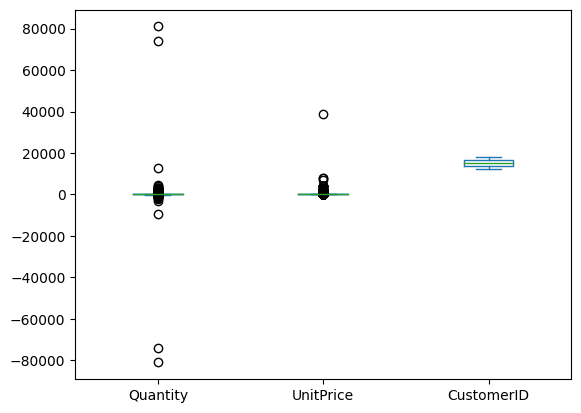

In [ ]:
df.plot.box()
plt.xticks();

In [ ]:
# Considerando a quantidade acima 10000 e o preço acima 5000 como outlier
# Removendo outliers extremos
df = df[(df['Quantity'] <= 10000) & (df['Quantity'] >= 0) & (df['UnitPrice'] <= 5000)]

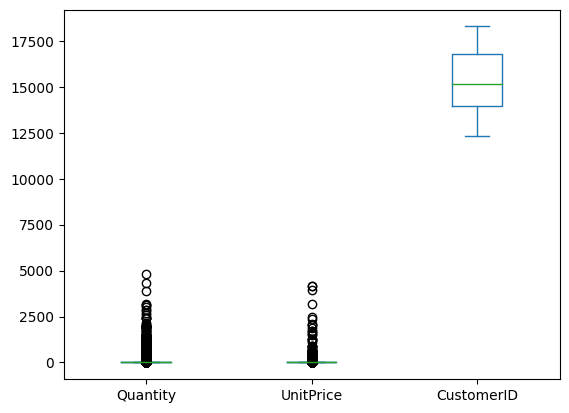

In [ ]:
df.plot.box()
plt.xticks();

# Formatando as colunas 'InvoiceDate' e 'CostumerID'

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392728 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392728 non-null  object 
 1   StockCode    392728 non-null  object 
 2   Description  392728 non-null  object 
 3   Quantity     392728 non-null  int64  
 4   InvoiceDate  392728 non-null  object 
 5   UnitPrice    392728 non-null  float64
 6   CustomerID   392728 non-null  float64
 7   Country      392728 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
# Formatando a coluna 'InvoiceDate' para poder fomatar para formato de data
df['InvoiceDate'] = df['InvoiceDate'].str.replace(' \d:\d\d','', regex=True)
df.head()

<ipython-input-137-bac19d6a26a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = df['InvoiceDate'].str.replace(' \d:\d\d','', regex=True)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  
0   12/1/2010       2.55     17850.0  United Kingdom  
1   12/1/2010       3.39     17850.0  United Kingdom  
2   12/1/2010       2.75     17850.0  United Kingdom  
3   12/1/2010       3.39     17850.0  United Kingdom  
4   12/1/2010       3.39     17850.0  United Kingdom

In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])


<ipython-input-138-29f17a93c466>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])


In [ ]:
# Formatando a coluna 'CustomerID' para int
df['CustomerID']=df['CustomerID'].astype('int')

<ipython-input-139-f3bca9df2338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID']=df['CustomerID'].astype('int')


In [ ]:
df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Criando uma coluna adicional

In [ ]:
df['TotalCost'] = df['Quantity'] * df['UnitPrice']
df.head()


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  
0  2010-12-01       2.55       17850  United Kingdom      15.30  
1  2010-12-01       3.39       17850  United Kingdom      20.34  
2  2010-12-01       2.75       17850  United Kingdom      22.00  
3  2010-12-01       3.39       17850  United Kingdom      20.34  
4  2010-12-01       3.39       17850  United Kingdom      20.34

#Calculando a data da última compra


In [ ]:
data_ultima_compra = df['InvoiceDate'].max()

print(f"A data da última compra no conjunto de dados é: {data_ultima_compra}")


A data da última compra no conjunto de dados é: 2011-12-09 12:50:00


#Plotando gráficos

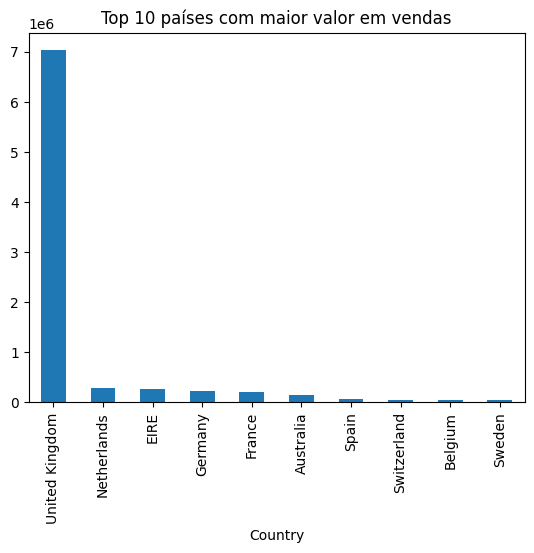

In [ ]:
# Top 10 países com maior valor em vendas
top_countries = df.groupby('Country')['TotalCost'].sum().nlargest(10)
top_countries.plot(kind='bar')
plt.title('Top 10 países com maior valor em vendas')
plt.show()

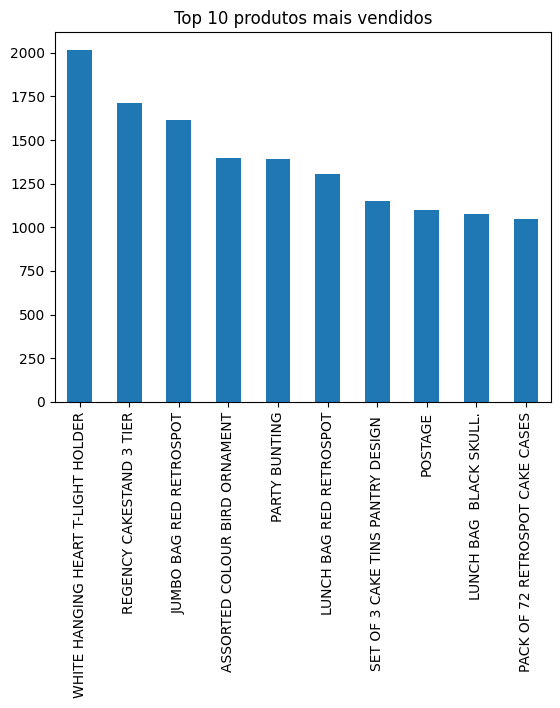

In [ ]:
# Top 10 produtos mais vendidos
top_products = df['Description'].value_counts().nlargest(10)
top_products.plot(kind='bar')
plt.title('Top 10 produtos mais vendidos')
plt.show()

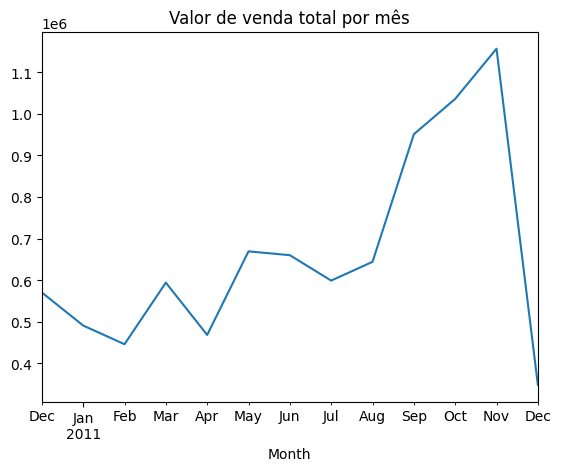

In [ ]:
# Valor de venda total por mês
df['Month'] = df['InvoiceDate'].dt.to_period('M') # cria uma nova coluna 'Month' com o mês da compra
sales_per_month = df.groupby('Month')['TotalCost'].sum()
sales_per_month.plot()
plt.title('Valor de venda total por mês')
plt.show()

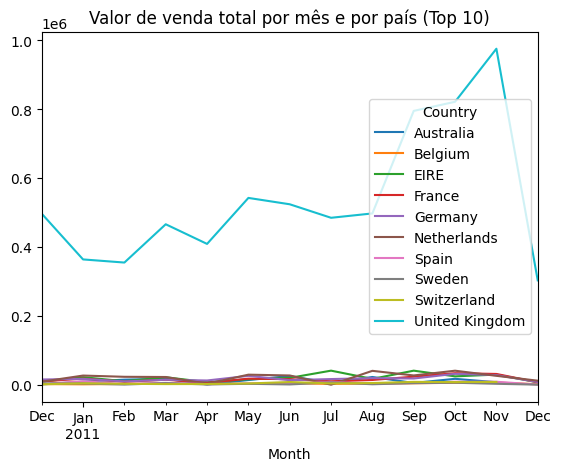

In [ ]:

# Valor de venda total por mês e por país (considere apenas os top 10)
top_countries_list = top_countries.index.tolist()
df_top_countries = df[df['Country'].isin(top_countries_list)]
sales_per_month_per_country = df_top_countries.groupby(['Month', 'Country'])['TotalCost'].sum().unstack()
sales_per_month_per_country.plot()
plt.title('Valor de venda total por mês e por país (Top 10)')
plt.show()

#Cálculo do RFM

In [ ]:
# Agrupando os dados por cliente e pedido/compra (InvoiceNo) e obtendo a data e o preço total do pedido
df_grouped = df.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate':'max', 'TotalCost':'sum'}).reset_index()

# Calculando Recency
snapshot_date = df_grouped['InvoiceDate'].max() + pd.DateOffset(days=1) # a data mais recente no dataset + 1 dia
df_R = df_grouped.groupby('CustomerID')['InvoiceDate'].apply(lambda x: (snapshot_date - x.max()).days)

# Calculando Frequency
df_F = df_grouped.groupby('CustomerID')['InvoiceNo'].count()

# Calculando Monetary
df_M = df_grouped.groupby('CustomerID')['TotalCost'].mean()

# Juntando R, F e M em um único DataFrame
rfm = pd.concat([df_R, df_F, df_M],axis=1)
rfm.columns = ['Recency', 'Frequency', 'Monetary']

print(rfm.head(10))


            Recency  Frequency     Monetary
CustomerID                                 
12347             2          7   615.714286
12348            75          4   449.310000
12349            19          1  1757.550000
12350           310          1   334.400000
12352            36          8   313.255000
12353           204          1    89.000000
12354           232          1  1079.400000
12355           214          1   459.400000
12356            23          3   937.143333
12357            33          1  6207.670000
